<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# üìù  Project1

## **ÌååÏùº Í∞ÄÏ†∏Ïò§Í∏∞ Î∞è import**

In [8]:
import pandas as pd
import numpy as np
import re
from google.colab import files
import io
import matplotlib.pyplot as plt 
import random
import seaborn as sns

In [9]:
uploaded = files.upload()

In [10]:
df = pd.read_csv('vgames2.csv',index_col=0)

FileNotFoundError: ignored

In [ ]:
df.head(3)

Name : Í≤åÏûÑÏùò Ïù¥Î¶ÑÏûÖÎãàÎã§.

Platform : Í≤åÏûÑÏù¥ ÏßÄÏõêÎêòÎäî ÌîåÎû´ÌèºÏùò Ïù¥Î¶ÑÏûÖÎãàÎã§.

Year : Í≤åÏûÑÏù¥ Ï∂úÏãúÎêú Ïó∞ÎèÑÏûÖÎãàÎã§.

Genre : Í≤åÏûÑÏùò Ïû•Î•¥ÏûÖÎãàÎã§.

Publisher : Í≤åÏûÑÏùÑ Ï†úÏûëÌïú ÌöåÏÇ¨ÏûÖÎãàÎã§.

NA_Sales : Î∂ÅÎØ∏ÏßÄÏó≠ÏóêÏÑúÏùò Ï∂úÍ≥†ÎüâÏûÖÎãàÎã§.

EU_Sales : Ïú†ÎüΩÏßÄÏó≠ÏóêÏÑúÏùò Ï∂úÍ≥†ÎüâÏûÖÎãàÎã§.

JP_Sales : ÏùºÎ≥∏ÏßÄÏó≠ÏóêÏÑúÏùò Ï∂úÍ≥†ÎüâÏûÖÎãàÎã§.

Other_Sales : Í∏∞ÌÉÄÏßÄÏó≠ÏóêÏÑúÏùò Ï∂úÍ≥†ÎüâÏûÖÎãàÎã§.

## **Ï†ÑÏ≤òÎ¶¨**

---



In [18]:
df.info()

NameError: ignored

###**Î∞úÍ≤¨Îêú Î¨∏Ï†ú **
1. `Platform` ÏóêÏÑú ÏßÄÏõê ÌîåÎû´Ìèº Î™ÖÏù¥ Ïà´ÏûêÏù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§.
  
  -> ÌñâÏùÑ Î™®Îëê **Ï†úÍ±∞ÌïúÎã§.**
2. `Year` ÏóêÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä N/A Ïù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§.
 
  -> Î¨∏ÏûêÏó¥Ïù∏ ÎìØ ÌïòÏòÄÏúºÎÇò Îã§Î•∏ Î¨∏Ï†úÎ°ú Ïù∏Ìï¥ Î¨∏ÏûêÏó¥Ï≤òÎüº Ï∂úÎ†•ÎêòÎäî ÌòÑÏÉÅÏù¥ÏóàÎã§. **Ï†úÍ±∞ÌïúÎã§**.
3. `Year` ÏóêÏÑú Ïó∞ÎèÑÏà´ÏûêÏùò Î≤îÏúÑÍ∞Ä ÏïÑÎãå Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§. 
  
  -> 1950ÎÖÑ ~ 2050ÎÖÑ Î≤îÏúÑ Ïù¥Ïô∏Ïùò Îç∞Ïù¥ÌÑ∞Îäî Î™®Îëê **Ï†úÍ±∞ÌïúÎã§. **

  -> ÏûêÎ£åÌòïÏùÑ intÎ°ú ÍµêÏ≤¥ÌïúÎã§.

4. `Genre, Publisher`Í∞Ä Í≥µÎ∞±Ïù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§.

  -> Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê **Ï†úÍ±∞ÌïúÎã§.**

5. `Publisher` Ïù¥Î¶ÑÏù¥ Ïà´ÏûêÌòïÏù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§. 

  -> Ïù¥Î¶ÑÏù¥ Ïà´ÏûêÎßå ÏûàÎäî ÌñâÏùÄ **Ï†úÍ±∞ÌïúÎã§.**

6. `Sales` Îç∞Ïù¥ÌÑ∞Îì§ÏóêÏÑú K,M Îì± Í∞íÎì§Ïùò Îã®ÏúÑÍ∞Ä Ï§ëÍµ¨ÎÇúÎ∞©Ïù¥Îã§.

  -> Î™®Îì† Îã®ÏúÑÎ•º M Îã®ÏúÑÎ°ú **ÌÜµÏùºÌïúÎã§**. Îã®ÏúÑ ÌëúÏãúÍ∞Ä ÏóÜÎäî Í∞íÏùÄ Î™®Îëê MÏúºÎ°ú Í∞ÄÏ†ïÌïúÎã§.

  -> 480KÎäî 0.48 Î°ú ÎÇòÌÉÄÎÇ∏Îã§. 4100KÎäî 4.1 Î°ú ÎÇòÌÉÄÎÇ∏Îã§.

  -> Ïà´ÏûêÏóê M,KÍ∞Ä Î∂ôÏùÄ Í≤ΩÏö∞ ÎñºÎ≤ÑÎ¶∞Îã§.

  -> ÏûêÎ£åÌòïÏùÑ floatÎ°ú ÍµêÏ≤¥ÌïúÎã§.

7. Í∏∞Ï¢ÖÏù¥ ÏóÜÏù¥ Î∞ÄÎ†§Ï†ÅÌòÄ Í≤∞Ï∏°Í∞íÏù¥ Ï°¥Ïû¨ÌïòÎäî Í∞íÏù¥ Ï°¥Ïû¨ÌïúÎã§.

  -> Ï†úÍ±∞ÌïúÎã§.

**1.** Platform ÏóêÏÑú ÏßÄÏõê ÌîåÎû´Ìèº Î™ÖÏù¥ Ïà´ÏûêÏù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§.

In [19]:
DF = df.copy() # ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏàòÏ†ï Î∞©ÏßÄ

NameError: ignored

In [ ]:
NotPlatform = df[~df['Platform'].str.contains(r'[A-Za-z]')].index # ÏïåÌååÎ≤≥ÏùÑ Ìè¨Ìï®ÌïòÏßÄ ÏïäÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞

In [ ]:
DF = DF.drop(NotPlatform).reset_index(drop = True)

**2.** Year ÏóêÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä N/A Ïù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§. 

**3.** Ïó∞ÎèÑÏà´ÏûêÏùò Î≤îÏúÑÍ∞Ä ÏïÑÎãå Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§.

In [ ]:
valid_Year = "Year>1950 & Year<2050"
DF = DF.query(valid_Year)

In [ ]:
DF.Year = DF.Year.astype('int')  # intÌòïÏúºÎ°ú Î≥ÄÍ≤Ω

**4.** Ïû•Î•¥,ÌçºÎ∏îÎ¶¨ÏÖîÍ∞Ä Í≥µÎ∞±Ïù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§.

In [ ]:
DF.isnull().sum()

In [ ]:
DF = DF.dropna()


In [ ]:
DF = DF.reset_index()

**5.** `Publisher` Ïù¥Î¶ÑÏù¥ Ïà´ÏûêÌòïÏù∏ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§. 

In [ ]:
NotPub = DF[~DF['Publisher'].str.contains(r'[A-Za-z]')].index # ÏïåÌååÎ≤≥ÏùÑ Ìè¨Ìï®ÌïòÏßÄ ÏïäÎäî Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞

In [ ]:
NotPub # ÏóÜÏúºÎãà pass Ï§ëÍ∞ÑÏóê Ï†úÍ±∞ÎêúÎìØ

In [ ]:
DF.info() # ÌòÑÏû¨ ÏÉÅÌô©

6.`Sales` Îç∞Ïù¥ÌÑ∞Îì§ÏóêÏÑú K,M Îì± Í∞íÎì§Ïùò Îã®ÏúÑÍ∞Ä Ï§ëÍµ¨ÎÇúÎ∞©Ïù¥Îã§.

-> Î™®Îì† Îã®ÏúÑÎ•º M Îã®ÏúÑÎ°ú ÌÜµÏùºÌïúÎã§.

-> 480KÎäî 0.48 Î°ú ÎÇòÌÉÄÎÇ∏Îã§. 4100KÎäî 4.1 Î°ú ÎÇòÌÉÄÎÇ∏Îã§.

-> Ïà´ÏûêÏóê M,KÍ∞Ä Î∂ôÏùÄ Í≤ΩÏö∞ ÎñºÎ≤ÑÎ¶∞Îã§.

-> ÏûêÎ£åÌòïÏùÑ floatÎ°ú ÍµêÏ≤¥ÌïúÎã§.

In [20]:
def gett_value(DF,Sales):
  if DF[DF['Sales'].str.contains('K')]:
    DF = DF[DF['Sales'].str.replace('K','').astype('float')]
  return DF/1000

In [21]:
# file export
file_name = 'sample1.csv'
# saving the excelsheet
DF.to_csv(file_name, index=False)

In [22]:
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
DF = pd.read_csv('sample3.csv',index_col=0)

**7.** Í≤∞Ï∏°Ïπò Ï†úÍ±∞

In [ ]:
DF['Other_Sales'][DF['Other_Sales'].isnull()]

In [ ]:
DF = DF.dropna().reset_index(drop=True)

In [ ]:
DF.info()

In [ ]:
DF

## **1. ÏßÄÏó≠Ïóê Îî∞ÎùºÏÑú ÏÑ†Ìò∏ÌïòÎäî Í≤åÏûÑ Ïû•Î•¥Í∞Ä Îã§Î•ºÍπå?**

In [23]:
DF.groupby('Genre')['NA_Sales'].sum()

Genre
Action          831.33
Adventure       100.95
Fighting        219.39
Misc            390.95
Platform        430.08
Puzzle          108.28
Racing          351.39
Role-Playing    307.08
Shooter         549.48
Simulation      180.62
Sports          662.19
Strategy         67.82
Name: NA_Sales, dtype: float64

In [24]:
NA_ratio = DF.groupby('Genre')['NA_Sales'].sum()
NA_ratio = NA_ratio.sort_values(ascending=False)

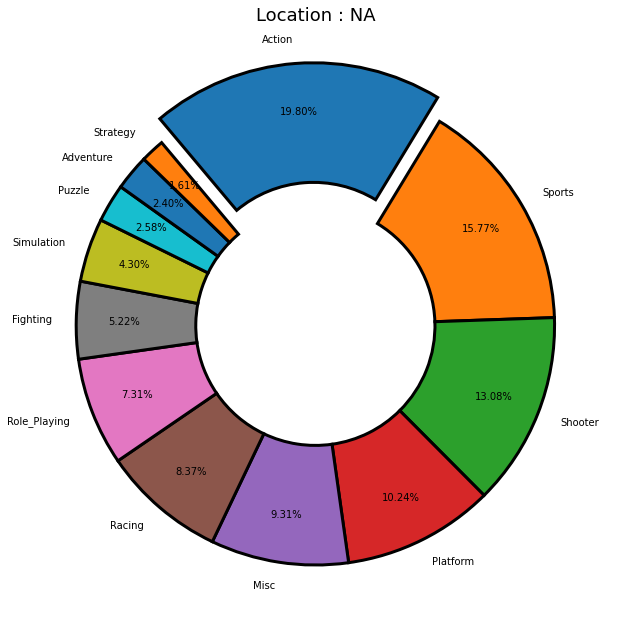

In [25]:
Action = NA_ratio.iloc[0]
Sports = NA_ratio.iloc[1]
Shooter = NA_ratio.iloc[2]
Platform = NA_ratio.iloc[3]
Misc = NA_ratio.iloc[4]
Racing = NA_ratio.iloc[5]
Role_Playing = NA_ratio.iloc[6]
Fighting = NA_ratio.iloc[7]
Simulation = NA_ratio.iloc[8]
Puzzle = NA_ratio.iloc[9]
Adventure = NA_ratio.iloc[10]
Strategy = NA_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Platform,Misc,Racing,Role_Playing,
         Fighting,Simulation,Puzzle,Adventure,Strategy]
labels = ['Action','Sports','Shooter','Platform','Misc','Racing','Role_Playing',
         'Fighting','Simulation','Puzzle','Adventure','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : NA", fontsize=18)

plt.show()


In [26]:
EU_ratio = DF.groupby('Genre')['EU_Sales'].sum().sort_values(ascending=False)

In [27]:
EU_ratio

Genre
Action          561.00
Sports          369.57
Shooter         305.95
Racing          234.07
Misc            207.30
Platform        198.68
Role-Playing    176.31
Simulation      112.66
Fighting         99.68
Adventure        63.30
Puzzle           49.59
Strategy         44.70
Name: EU_Sales, dtype: float64

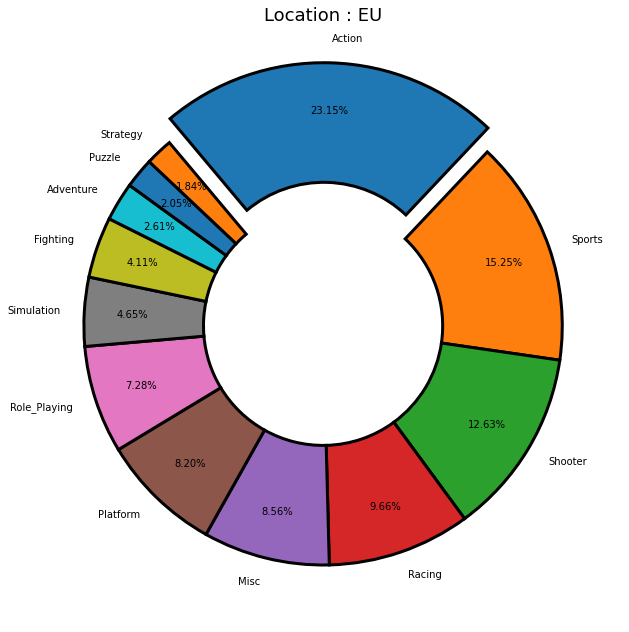

In [28]:
Action = EU_ratio.iloc[0]
Sports = EU_ratio.iloc[1]
Shooter = EU_ratio.iloc[2]
Racing = EU_ratio.iloc[3]
Misc = EU_ratio.iloc[4]
Platform = EU_ratio.iloc[5]
Role_Playing = EU_ratio.iloc[6]
Simulation = EU_ratio.iloc[7]
Fighting = EU_ratio.iloc[8]
Adventure = EU_ratio.iloc[9]
Puzzle = EU_ratio.iloc[10]
Strategy = EU_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Racing,Misc,Platform,Role_Playing,
         Simulation,Fighting,Adventure,Puzzle,Strategy]
labels = ['Action','Sports','Shooter','Racing','Misc','Platform','Role_Playing',
         'Simulation','Fighting','Adventure','Puzzle','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : EU", fontsize=18)

plt.show()

In [29]:
NA_ratio = DF.groupby('Genre')['NA_Sales'].sum()
NA_ratio = NA_ratio.sort_values(ascending=False)

In [30]:
JP_ratio = DF.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)

In [31]:
JP_ratio

Genre
Role-Playing    336.25
Action          167.61
Sports          134.58
Platform        129.22
Misc            103.71
Fighting         86.39
Simulation       63.46
Puzzle           56.19
Racing           55.42
Adventure        51.67
Strategy         48.13
Shooter          37.34
Name: JP_Sales, dtype: float64

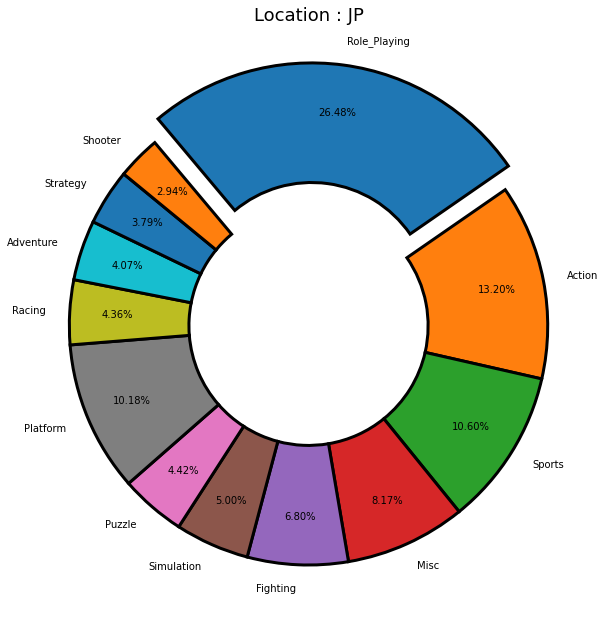

In [32]:
Role_Playing = JP_ratio.iloc[0]
Action = JP_ratio.iloc[1]
Sports = JP_ratio.iloc[2]
Platform = JP_ratio.iloc[3]
Misc = JP_ratio.iloc[4]
Fighting = JP_ratio.iloc[5]
Simulation = JP_ratio.iloc[6]
Puzzle = JP_ratio.iloc[7]
Racing = JP_ratio.iloc[8]
Adventure = JP_ratio.iloc[9]
Strategy = JP_ratio.iloc[10]
Shooter = JP_ratio.iloc[11]

ratio = [Role_Playing,Action,Sports,Misc,Fighting,Simulation,Puzzle,Platform,
         Racing,Adventure,Strategy,Shooter]
labels = ['Role_Playing','Action','Sports','Misc','Fighting','Simulation',
          'Puzzle','Platform',
         'Racing','Adventure','Strategy','Shooter']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : JP", fontsize=18)

plt.show()

In [33]:
Other_ratio = DF.groupby('Genre')['Other_Sales'].sum().sort_values(ascending=False)

In [34]:
Other_ratio

Genre
Action          183.43
Sports          131.71
Shooter         100.58
Racing           76.22
Misc             72.51
Role-Playing     54.71
Platform         50.99
Simulation       41.23
Fighting         36.09
Adventure        16.64
Puzzle           12.24
Strategy         11.20
Name: Other_Sales, dtype: float64

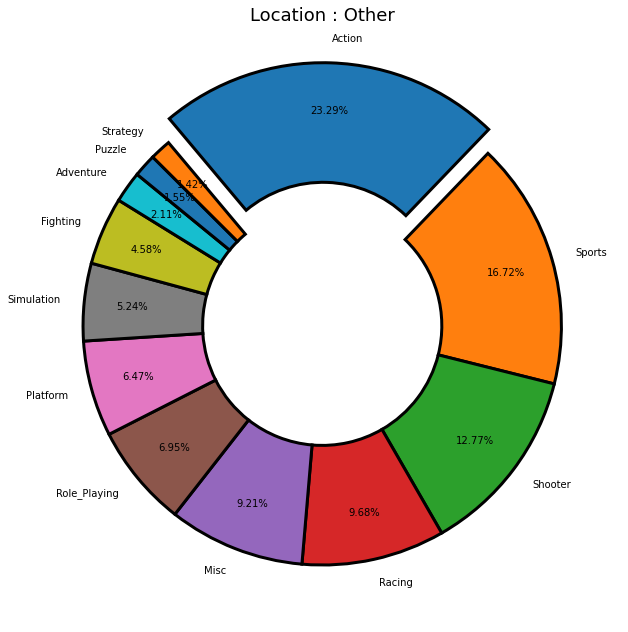

In [35]:
Action = Other_ratio.iloc[0]
Sports = Other_ratio.iloc[1]
Shooter = Other_ratio.iloc[2]
Racing = Other_ratio.iloc[3]
Misc = Other_ratio.iloc[4]
Role_Playing = Other_ratio.iloc[5]
Platform = Other_ratio.iloc[6]
Simulation = Other_ratio.iloc[7]
Fighting = Other_ratio.iloc[8]
Adventure = Other_ratio.iloc[9]
Puzzle = Other_ratio.iloc[10]
Strategy = Other_ratio.iloc[11]

ratio = [Action,Sports,Shooter,Racing,Misc,Role_Playing,Platform,Simulation,
Fighting,Adventure,Puzzle,Strategy]
labels = ['Action','Sports','Shooter','Racing','Misc','Role_Playing','Platform',
          'Simulation',
'Fighting','Adventure','Puzzle','Strategy']

exp = [0.1,0,0,0,0,0,0,0,0,0,0,0]
w = {"edgecolor": "black", "linewidth":3, "width":0.5}
plt.figure(figsize=(11, 11))
plt.pie(ratio, labels = labels, startangle=130,pctdistance=0.8,counterclock = False, explode=exp, autopct='%.2f%%',wedgeprops=w)
plt.title("Location : Other", fontsize=18)

plt.show()

**ÎåÄÎ∂ÄÎ∂ÑÏùò ÏßÄÏó≠ÏóêÏÑú Ïï°ÏÖò, Ïä§Ìè¨Ï∏†, ÏäàÌåÖÍ≤åÏûÑÏùò ÌåêÎß§ÏàúÏúÑÍ∞Ä ÎÜíÏïòÏúºÎÇò** 

**Ïú†ÎèÖ ÏùºÎ≥∏ÏóêÏÑúÎßåÏùÄ Î°§ÌîåÎ†àÏûâ Í≤åÏûÑÏù¥ ÏïïÎèÑÏ†Å Í∞ïÏÑ∏Î•º Î≥¥Ïù¥Î©∞ ÏäàÌåÖÍ≤åÏûÑÏùÄ Ïù∏Í∏∞Í∞Ä ÏóÜÎäî Í≤ÉÏúºÎ°ú ÎÇòÌÉÄÎÇ¨Îã§.**

## **2. Ïó∞ÎèÑÎ≥Ñ Í≤åÏûÑÏùò Ìä∏Î†åÎìúÍ∞Ä ÏûàÏùÑÍπå?**

Í≤åÏûÑÏùò Ìä∏Î†åÎìúÎ•º ÌäπÏ†ï Ïû•Î•¥Ïùò Ïú†ÌñâÏù¥ÎùºÍ≥† Í∞ÄÏ†ïÌïúÎã§.

ÏÜåÎπÑÏûêÏûÖÏû•ÏóêÏÑú Ïó∞ÎèÑÎ≥ÑÎ°ú Ïú†ÌñâÌïú Í≤åÏûÑÏû•Î•¥Í∞Ä ÏûàÏùÑ Í≤ÉÏù¥Í≥†, 

Í≤åÏûÑÏóÖÏ≤¥ ÏûÖÏû•ÏóêÏÑú Ïú†ÌñâÌïú Í≤åÏûÑÏù¥ ÏûàÏùÑ Í≤ÉÏù¥Î©∞ ÏïÑÎßà Îëò ÏÇ¨Ïù¥Ïóê Ïú†ÏùòÎØ∏Ìïú Ï†ïÎπÑÎ°Ä Í¥ÄÍ≥ÑÍ∞Ä ÏûàÏùÑÍ≤ÉÏù¥ÎùºÍ≥† ÏòàÏÉÅ. 

ÏÜåÎπÑÏûêÍ∞Ä ÌäπÏ†ï Ïû•Î•¥Ïùò Í≤åÏûÑÏùÑ ÎßéÏù¥ ÏÇ¨Í≤åÎêòÎ©¥ ÏóÖÏ≤¥ÏóêÏÑúÎèÑ ÎèôÏùº Ïû•Î•¥Ïùò Í≤åÏûÑÏùÑ ÎßåÎì§Í≤å Îê† Í≤ÉÏù¥Í∏∞ ÎïåÎ¨∏


In [36]:
released = DF.groupby('Year')['Genre'].value_counts() # Í∞Å ÎÖÑÎèÑÎ≥Ñ Î∞úÎß§ Ïû•Î•¥Ïùò Í∞ØÏàò

In [37]:
released=released.unstack('Genre').fillna(0).astype('int') # Î∞úÎß§ÏïàÎêú Î∂ÄÎ∂ÑÏùÄ 0ÏúºÎ°ú Ï±ÑÏö∞Í≥† unstack
                                                           # index = Year

In [38]:
released.columns

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [39]:
released.rename(columns={'Role-Playing':'Role_Playing'},inplace=True) 

In [40]:
released

Genre  Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Year                                                                 
1983        0          0         0     1         4       0       0   
1984        1          0         0     1         1       3       2   
1985        2          0         1     0         4       3       0   
1986        6          0         0     0         5       0       1   
1987        0          1         2     0         2       0       0   
1988        1          0         0     0         4       1       1   
1989        1          0         0     1         3       4       0   
1990        3          0         0     0         3       2       2   
1991        5          2         1     1         6       4       1   
1992        1          4         7     2         6       5       2   
1993        6          1        11     3        11       3       2   
1994        4          4        21     6        11       3       8   
1995        7         13        28    22        13      12      12   
1996       20         16        30    23        14       9      20   
1997       29         14        28    12        18      14      36   
1998       44         23        41    21        24      13      47   
1999       39         19        24    25        18       6      49   
2000       43         16        29    20        23      12      43   
2001       66         20        18    26        43      15      70   
2002      125         41        54    44        77      20     102   
2003      144         12        44    53        84       7     107   
2004      124         38        39    67        64      24      70   
2005      191         42        43   110        82      32      76   
2006      182         71        54   109        54      42      75   
2007      210         83        50   150        42      63      83   
2008      218        165        56   208        62      63      82   
2009      270        140        53   204        28      78      83   
2010      226        152        40   200        31      44      57   
2011      238        106        49   183        37      41      63   
2012      263         57        29    37        11      11      30   
2013      148         60        19    41        37       3      16   
2014      186         75        22    41        10       7      27   
2015      250         53        21    38        14       6      19   
2016      117         33        14    17        10       0      19   
2017        1          0         0     0         0       0       0   
2020        0          0         0     0         0       0       0   

Genre  Role_Playing  Shooter  Simulation  Sports  Strategy  
Year                                                        
1983              0        0           0       1         0  
1984              0        3           0       2         0  
1985              0        1           1       1         0  
1986              1        3           0       2         0  
1987              3        0           0       2         0  
1988              3        0           1       2         0  
1989              2        1           0       3         0  
1990              2        0           1       3         0  
1991              5        3           2       7         4  
1992              5        3           1       4         3  
1993              9        2           1       9         2  
1994             17       11           7      22         6  
1995             24       28          14      29        13  
1996             28       23          13      51        12  
1997             23       27          19      46        21  
1998             26       23           8      70        34  
1999             32       16          20      62        26  
2000             29       19          15      81        15  
2001             41       36          28      95        20  
2002             54       78          19     187        22

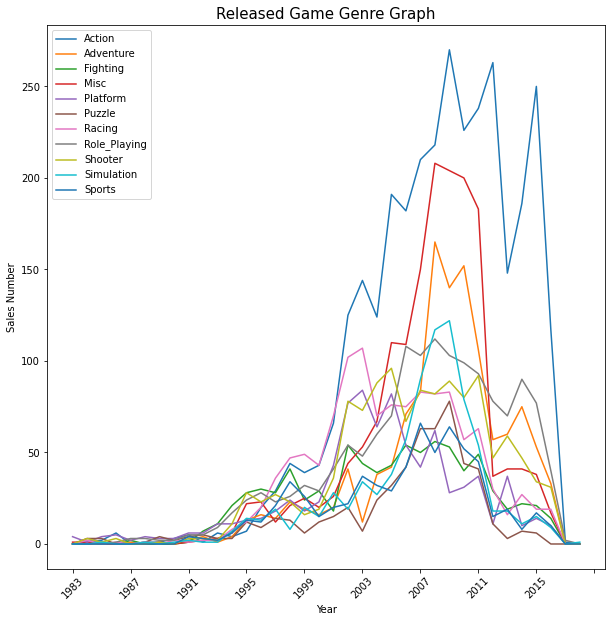

In [41]:
'''
ÌïúÍ∫ºÎ≤àÏóê Í∑∏Î¶¨Î©¥ Î≤îÎ°ÄÍ∞Ä 10Í∞úÍ∞Ä ÎÑòÏñ¥Í∞îÏùÑ Í≤ΩÏö∞ ÏÉâÏù¥ Í∞ôÏùÄ Ìå®ÌÑ¥Ïù¥ Î∞òÎ≥µÎêòÎäîÎç∞
ÏÉâÍπî Î∂ÑÎ¶¨Î•º Ìï¥Î≥¥Î†§Í≥† ÌñàÏúºÎÇò, Í≤∞Íµ≠ ÎÖ∏Í∞ÄÎã§ Î∞ñÏóê Î∞©Î≤ïÏùÑ Î™®Î•¥Í≤†Îã§..,
'''
plt.figure(figsize=(10, 10))
plt.plot(released.index,released.Action)
plt.plot(released.index,released.Adventure)
plt.plot(released.index,released.Fighting)
plt.plot(released.index,released.Misc)
plt.plot(released.index,released.Platform)
plt.plot(released.index,released.Puzzle)
plt.plot(released.index,released.Racing)
plt.plot(released.index,released.Role_Playing)
plt.plot(released.index,released.Shooter)
plt.plot(released.index,released.Simulation)
plt.plot(released.index,released.Strategy)

plt.title('Released Game Genre Graph',fontsize=15)

plt.xticks(np.arange(0,40,4),rotation=45)
plt.xlabel('Year')
plt.ylabel('Sales Number')
plt.legend(released,loc='upper left')
plt.show()

ÏóÖÏ≤¥Îì§Ïùò Ïû•Î•¥Î≥Ñ Ï∂úÍ≥†ÎüâÏùÑ Î≥¥ÏïòÏùÑ Îïå, 

1991ÎÖÑ ÍπåÏßÄÎäî Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥ÏóÜÏù¥ ÎπÑÎì±ÎπÑÎì±Ìïú Î™®ÏäµÏùÑ Î≥¥Ïó¨Ï£ºÎã§Í∞Ä 
1995ÎÖÑÎ∂ÄÌÑ∞ Í≤©Ìà¨Í≤åÏûÑ, Î°§ÌîåÎ†àÏûâÍ≤åÏûÑ, ÏäàÌåÖÍ≤åÏûÑÏù¥ Í∞ïÏÑ∏Î•º Î≥¥Ïù∏Îã§.

2000ÎÖÑÎèÑÎ∂ÄÌÑ∞Îäî Î†àÏù¥Ïã±Í≤åÏûÑ, Ïï°ÏÖòÍ≤åÏûÑÏù¥ ÎßéÏù¥ Ï∂úÏãúÎêòÏóàÍ≥†, 

2005ÎÖÑÎèÑÎ∂ÄÌÑ∞Îäî Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ï∂úÍ≥†ÎüâÏù¥ ÍµâÏû•Ìûà ÎäòÏñ¥ÎÇ®Í≥º ÎèôÏãúÏóê ÌäπÌûà Ïï°ÏÖòÍ≤åÏûÑÏùò ÏïïÎèÑÏ†Å Í∞ïÏÑ∏Î•º Î≥º Ïàò ÏûàÎã§. 

ÎòêÌïú Ïñ¥ÎìúÎ≤§Ï≥ê, ÏãúÎÆ¨Î†àÏù¥ÏÖò,ÏäàÌåÖÍ≤åÏûÑ,Í∏∞ÌÉÄÏû•Î•¥Ïùò Ï∂úÍ≥†Í∞Ä ÎààÏóêÎùÑÍ≤å ÎäòÏñ¥ÎÇòÍ≥† Î†àÏù¥Ïã±Í≤åÏûÑÏù¥ ÏÑúÏÑúÌûà Ï§ÑÏñ¥Îì§Í∏∞ ÏãúÏûëÌïúÎã§.

2012ÎÖÑÎèÑ Î∂ÄÌÑ∞Îäî ÏßëÍ≥ÑÎêòÎäî Î™®Îì† Ïû•Î•¥Ïùò Í≤åÏûÑÏùò Ï∂úÍ≥†Í∞Ä Í∏âÍ≤©ÌïòÍ≤å Ï§ÑÏñ¥Îì§ÏßÄÎßå, 

Ïï°ÏÖòÍ≤åÏûÑÏùÄ ÎπÑÍµêÏ†Å Í∑∏ Í∞êÏÜåÌè≠Ïù¥ Ï†ÅÍ≥† 2017ÎÖÑ Î¨¥Î†µÏóê Îã§Ïãú Í≥†Ï†êÏùÑ Ï∞çÏóàÎçò 2008ÎÖÑÎèÑ ÏàòÏ§ÄÏùò Ï∂úÍ≥†ÎüâÏúºÎ°ú ÌöåÎ≥µÌïúÎã§.

ÎÇòÎ®∏ÏßÄ Í≤åÏûÑÎì§ÎèÑ 2017ÎÖÑ Î¨¥Î†µ Îã§Ïãú Î∞òÎì±ÌïòÏßÄÎßå ÏòàÎÖÑÏóê ÎπÑÌïòÎ©¥ ÌïúÏ∞∏ ÎØ∏ÏπòÏßÄ Î™ªÌïòÎäî ÏàòÏ§ÄÏùò Ï∂úÍ≥†ÎüâÏùÑ Î≥¥Ïó¨Ï£ºÏñ¥ ÏΩòÏÜîÍ≤åÏûÑÏãúÏû•Ïù¥ ÏÉÅÎãπÌûà ÏúÑÏ∂ïÎêòÏóàÎã§Í≥† ÌåêÎã®ÎêúÎã§.

ÌïúÍµ≠ ÏΩòÌÖêÏ∏† ÏßÑÌù•ÏõêÏùò Í∏ÄÎ°úÎ≤åÍ≤åÏûÑÏÇ∞ÏóÖ Ìä∏Î†åÎìúÏóê Îî∞Î•¥Î©¥ ÏΩòÏÜîÍ≤åÏûÑÏóêÏÑú Î™®Î∞îÏùºÍ≤åÏûÑÏúºÎ°ú Í≤åÏûÑÏÇ∞ÏóÖÏùò Ï§ëÏã¨Ïù¥ ÎÑòÏñ¥Í∞êÏóê Îî∞Îùº 

Ï§ëÏÜåÍ∞úÎ∞úÏÇ¨Îì§ÏùÑ Ï£ºÏ∂ïÏúºÎ°ú ÏΩòÏÜîÍ≤åÏûÑ Î∞úÎß§Î•º Ï§ÑÏù¥Í≥† ÏûàÎã§Îäî Ï∂îÏ†ïÏùÑ Ìï† Ïàò ÏûàÎã§.

https://www.kocca.kr/kocca/bbs/view/B0000143/1758003.do?searchCnd=1&searchWrd=&cateTp1=&cateTp2=&useYn=&menuNo=204150&categorys=0&subcate=0&cateCode=&type=&instNo=0&questionTp=&ufSetting=&recovery=&option1=&option2=&year=&morePage=&qtp=&domainId=&sortCode=&pageIndex=16


 ## **3. Ï∂úÍ≥†ÎüâÏù¥ ÎÜíÏùÄ Í≤åÏûÑÏóê ÎåÄÌïú Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî ÌîÑÎ°úÏÑ∏Ïä§**

Ï£ºÏñ¥ÏßÑ ÏûêÎ£åÏóêÏÑú ÏñºÎßàÎÇò Í∞Å ÏóÖÏ≤¥Í∞Ä ÏñºÎßàÎÇò Ï†úÌíàÏùÑ Ï∂úÍ≥†ÌñàÎäîÏßÄÎäî Ï£ºÏñ¥ÏßÑ ÏûêÎ£åÏóê ÎÇòÏôÄÏûàÏßÄ ÏïäÍ∏∞ÎïåÎ¨∏Ïóê, 

Ï∂úÍ≥†ÎüâÏùÄ ÌåêÎß§ÎüâÍ≥º Í∞ôÎã§Í≥† Ìï† ÏàòÎäî ÏóÜÏúºÎÇò Ïó¨Í∏∞ÏóêÏÑúÎäî Ï∂úÍ≥†Ìïú Ï†úÌíàÏù¥ Î™®Îëê ÌåîÎ†∏Îã§Îäî Í∞ÄÏ†ïÌïòÏóê 

ÏµúÏ¢Ö ÌåêÎß§ÎüâÏúºÎ°ú Ï∂úÍ≥†ÎüâÏùÑ Ï∂îÏ†ïÌïòÍ∏∞Î°ú ÌïúÎã§.

**Í∞ôÏùÄ Í≤åÏûÑÏù¥ÎùºÎ©¥ Ï∂úÍ≥† ÌîåÎû´ÌèºÏù¥ Îã§Î•¥Îã§Í≥†Ìï¥ÏÑú Îã§Î•∏ Í≤åÏûÑÏúºÎ°ú Ï∑®Í∏âÌïòÏßÄ ÏïäÍ≤å Ï£ºÏùòÌïúÎã§.**

In [44]:
DF2 = DF.copy() #ÌõºÏÜê Î∞©ÏßÄ

In [45]:
# sum_Sales = Í∞Å ÏßÄÏó≠Ïùò Ï¥ù ÌåêÎß§ÎüâÏùò Ìï©
DF2['sum_Sales'] = DF2['NA_Sales'] + DF2['EU_Sales']+ DF2['JP_Sales']+ DF2['Other_Sales']

In [46]:
#NA_ratio = DF.groupby('Genre')['NA_Sales'].sum()
#NA_ratio = NA_ratio.sort_values(ascending=False)

In [69]:
name_sumSale = DF2[['Name','Platform','Year','Genre','Publisher','sum_Sales']]
name_sumSale.sort_values(['Name','sum_Sales'],ascending=True) 

Name Platform  Year         Genre  \
15381               .hack//G.U. Vol.1//Rebirth      PS2  2006  Role-Playing   
6891              .hack//G.U. Vol.2//Reminisce      PS2  2006  Role-Playing   
10294  .hack//G.U. Vol.2//Reminisce (jp sales)      PS2  2006  Role-Playing   
12709            .hack//G.U. Vol.3//Redemption      PS2  2007  Role-Playing   
1135                   .hack//Infection Part 1      PS2  2002  Role-Playing   
...                                        ...      ...   ...           ...   
3379                thinkSMART: Chess for Kids       DS  2011          Misc   
13491                             uDraw Studio      Wii  2010          Misc   
2961              uDraw Studio: Instant Artist     X360  2011          Misc   
14515             uDraw Studio: Instant Artist      Wii  2011          Misc   
207               ¬°Shin Chan Flipa en colores!       DS  2007      Platform   

                Publisher  sum_Sales  
15381  Namco Bandai Games       0.17  
6891   Namco Bandai Games       0.23  
10294  Namco Bandai Games       0.16  
12709  Namco Bandai Games       0.17  
1135                Atari       1.26  
...                   ...        ...  
3379   Mentor Interactive       0.01  
13491                 THQ       2.45  
2961                  THQ       0.02  
14515                 THQ       0.19  
207             505 Games       0.14  

[16024 rows x 6 columns]

In [70]:
result = name_sumSale['sum_Sales'].groupby(name_sumSale['Name']).sum()

In [71]:
result # Ïù¥Î¶ÑÎ≥ÑÎ°ú Ìï© Ï†ïÎ¶¨Îêú ÏãúÎ¶¨Ï¶à

Name
.hack//G.U. Vol.1//Rebirth                 0.17
.hack//G.U. Vol.2//Reminisce               0.23
.hack//G.U. Vol.2//Reminisce (jp sales)    0.16
.hack//G.U. Vol.3//Redemption              0.17
.hack//Infection Part 1                    1.26
                                           ... 
thinkSMART FAMILY!                         0.03
thinkSMART: Chess for Kids                 0.01
uDraw Studio                               2.45
uDraw Studio: Instant Artist               0.21
¬°Shin Chan Flipa en colores!               0.14
Name: sum_Sales, Length: 11136, dtype: float64

### **1-1. Dot product**

- Dot productÎ•º Ïù¥Ïö©ÌïòÏó¨ Íµ¨Îß§ÏûêÎ≥Ñ Íµ¨Îß§ Ï¥ùÌï©ÏùÑ Í≥ÑÏÇ∞ÌïòÏÑ∏Ïöî.
  - Data Description
    - People : Íµ¨Îß§Ïûê
    - Name : Ï†úÌíàÎ™Ö
    - Price : Ï†úÌíà Í∞úÎãπ Í∞ÄÍ≤©
    - Amount : Ï†úÌíà Íµ¨Îß§ Í∞ØÏàò

|People|Name|Price|Amount|
|:-:|:-:|:-:|:-:|
|X|A|100|35|
|X|B|500|10|
|X|C|250|25|
|X|D|50|40|
|Y|A|100|-|
|Y|B|500|50|
|Y|C|250|50|
|Y|D|50|-|
|Z|A|100|-|
|Z|B|500|-|
|Z|C|250|100|
|Z|D|50|-|

##### **Q1. Dot productÎ•º ÌÜµÌï¥ Íµ¨Ìïú Íµ¨Îß§Ïûê XÏùò Íµ¨Îß§ Ï¥ùÌï©ÏùÑ Ïì∞ÏÑ∏Ïöî.**

In [49]:
sp.Matrix(array) # array

NameError: ignored